### บทที่ 3: โครงข่ายประสาทเทียม (Artificial Neural Network) และการประยุกต์สำหรับการจำแนกรูปภาพ



**1.4.1	ตัวอย่างการสร้างโครงข่ายประสาทเทียมแบบ Multilayer Feedforward Network (มี 1 hidden layer)**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sample dataset: 3 inputs, corresponding to 2 outputs
X = np.array([[0, 0, 1],
              [1, 1, 0],
              [0, 1, 1],
              [1, 0, 0]])

Y = np.array([[1, 0],
              [0, 1],
              [1, 0],
              [0, 1]])

# Define the ANN model
model = Sequential([
    Dense(5, activation='relu', input_shape=(3,)),  # Hidden layer with 5 neurons
    Dense(2, activation='softmax')  # Output layer with 2 neurons
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, Y, epochs=100, verbose=1)

# Test prediction
print("Predictions:")
print(model.predict(X))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7500 - loss: 0.7425
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5000 - loss: 0.7412
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5000 - loss: 0.7399
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5000 - loss: 0.7386
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5000 - loss: 0.7374
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.5000 - loss: 0.7361
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5000 - loss: 0.7348
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.5000 - loss: 0.7336
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.5000 - loss: 0.7323
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.5000 - loss: 0.7311
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5000 - loss: 0.7299
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.50

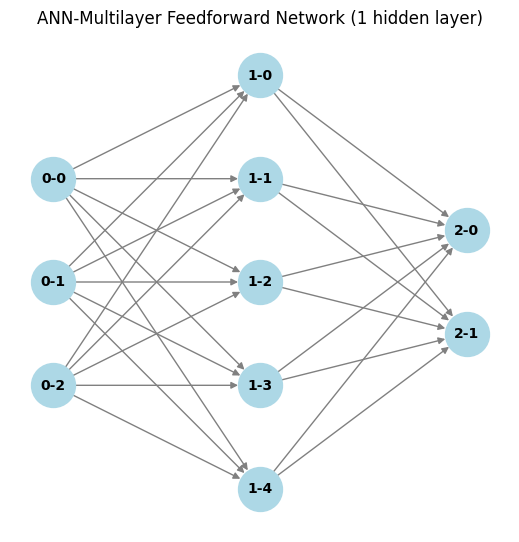

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_ann():
    layers = [3, 5, 2]  # จำนวนโหนดในแต่ละชั้น (Input, Hidden, Output)
    G = nx.DiGraph()  # สร้าง Directed Graph

    pos = {}  # เก็บตำแหน่งโหนด

    # วาดโหนดในแต่ละชั้น
    x_offset = 0
    for layer_idx, num_nodes in enumerate(layers):
        y_offset = (num_nodes - 1) / 2  # ให้โหนดอยู่ตรงกลาง
        for i in range(num_nodes):
            node_id = f"{layer_idx}-{i}"  # ตั้งชื่อโหนด เช่น "0-0" (Input 1), "1-0" (Hidden 1)
            G.add_node(node_id, layer=layer_idx)
            pos[node_id] = (x_offset, y_offset - i)  # กำหนดตำแหน่งโหนด

        x_offset += 2  # เว้นระยะห่างระหว่างชั้น

    # วาดเส้นเชื่อมระหว่างชั้น
    for layer_idx in range(len(layers) - 1):
        for i in range(layers[layer_idx]):  # นิวรอนในชั้นปัจจุบัน
            for j in range(layers[layer_idx + 1]):  # นิวรอนในชั้นถัดไป
                G.add_edge(f"{layer_idx}-{i}", f"{layer_idx + 1}-{j}")

    # วาดกราฟ
    plt.figure(figsize=(5, 5))
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
    plt.title("ANN-Multilayer Feedforward Network (1 hidden layer)")
    plt.show()

# เรียกใช้งานฟังก์ชันวาด ANN
draw_ann()


**1.4.2	ตัวอย่างการสร้างโครงข่ายประสาทเทียมแบบ Multilayer Feedforward Network (multi-hidden layer)**

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ข้อมูลตัวอย่าง (3 input, 2 output)
X = np.array([[0, 0, 1],
              [1, 1, 0],
              [0, 1, 1],
              [1, 0, 0]])

Y = np.array([[1, 0],
              [0, 1],
              [1, 0],
              [0, 1]])

# สร้างโมเดลที่มีหลาย Hidden Layers
model = Sequential([
    Dense(8, activation='relu', input_shape=(3,)),  # Hidden Layer 1 (8 neurons)
    Dense(6, activation='relu'),  # Hidden Layer 2 (6 neurons)
    Dense(4, activation='relu'),  # Hidden Layer 3 (4 neurons)
    Dense(2, activation='softmax')  # Output Layer (2 neurons)
])

# คอมไพล์โมเดล
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# เทรนโมเดล
model.fit(X, Y, epochs=100, verbose=1)

# ทดสอบการทำนายผล
print("Predictions:")
print(model.predict(X))


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7206
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.7165
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.7125
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.7085
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.7045
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.7006
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.6967
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5000 - loss: 0.6928
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.6889
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5000 - loss: 0.6851
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5000 - loss: 0.6813
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss

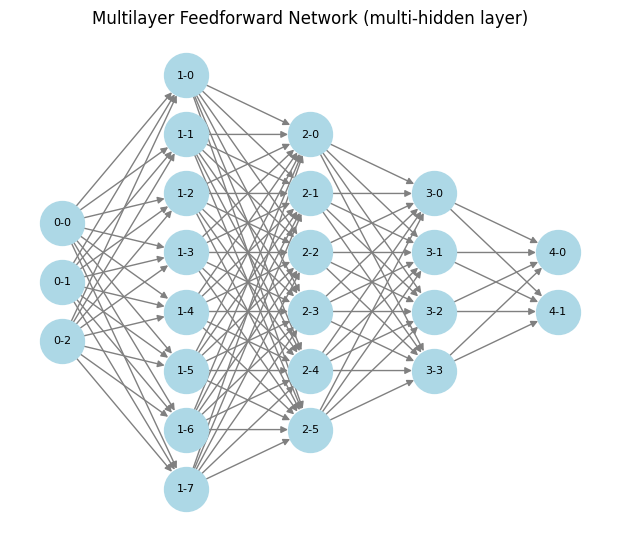

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_ann():
    layers = [3, 8, 6, 4, 2]  # (Input, Hidden1, Hidden2, Hidden3, Output)
    G = nx.DiGraph()
    pos = {}

    x_offset = 0
    for layer_idx, num_nodes in enumerate(layers):
        y_offset = (num_nodes - 1) / 2
        for i in range(num_nodes):
            node_id = f"{layer_idx}-{i}"
            G.add_node(node_id, layer=layer_idx)
            pos[node_id] = (x_offset, y_offset - i)

        x_offset += 2

    for layer_idx in range(len(layers) - 1):
        for i in range(layers[layer_idx]):
            for j in range(layers[layer_idx + 1]):
                G.add_edge(f"{layer_idx}-{i}", f"{layer_idx + 1}-{j}")

    plt.figure(figsize=(6, 5))
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=8, edge_color='gray')
    plt.title("Multilayer Feedforward Network (multi-hidden layer)")
    plt.show()

draw_ann()


**2.	การประยุกต์โครงข่ายประสาทเทียมสำหรับการจำแนกรูปภาพ**

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')
model.save('cifar10_ANN_model.h5')
print("Model saved to 'cifar10_ANN_model.h5'")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 34ms/step - accuracy: 0.2729 - loss: 2.0566 - val_accuracy: 0.3676 - val_loss: 1.7470
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.3930 - loss: 1.6973 - val_accuracy: 0.4252 - val_loss: 1.6097
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.4289 - loss: 1.5967 - val_accuracy: 0.4559 - val_loss: 1.5225
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.4546 - loss: 1.5307 - val_accuracy: 0.4374 - val_loss: 1.5706
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.4667 - loss: 1.4949 - val_accuracy: 0.4666 - val_loss: 1.4943
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.4766 - loss: 1.4618 - val_accuracy: 0.4770 - val_loss: 1.4738
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.4936 - loss: 1.4223 - val_accuracy: 0.4764 - val_loss: 1.4698
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.5012 - loss: 1

Test accuracy: 49.31%
Model saved to 'cifar10_ANN_model.h5'


Model loaded from 'cifar10_ANN_model.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


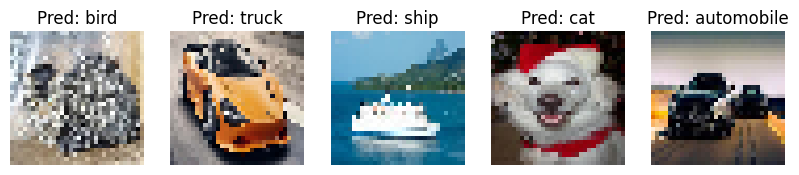

In [15]:
model = load_model('/content/cifar10_ANN_model.h5')
print("Model loaded from 'cifar10_ANN_model.h5'")
from tensorflow.keras.preprocessing import image
image_folder = '/content/sample_data/test_images'
test_images = []
image_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder)[:5]]
for img_path in image_paths:
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = img_array.astype('float32') / 255.0
    test_images.append(img_array)
test_images = np.array(test_images)
predictions = model.predict(test_images)
plt.figure(figsize=(10, 5))
for i in range(len(test_images)):
    plt.subplot(1, len(test_images), i + 1)
    plt.imshow(test_images[i])
    plt.axis('off')
    predicted_label = np.argmax(predictions[i])
    plt.title(f"Pred: {class_names[predicted_label]}", fontsize=12)
plt.show()

Model loaded from 'cifar10_ANN_model.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


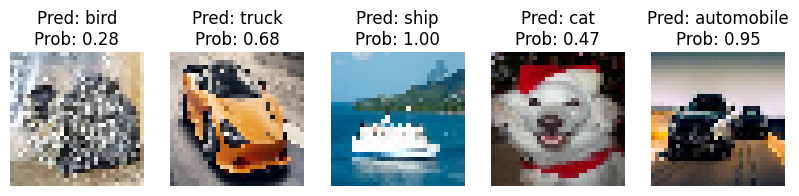

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

# โหลดโมเดล
model = load_model('/content/cifar10_ANN_model.h5')
print("Model loaded from 'cifar10_ANN_model.h5'")

# ชื่อคลาสที่ใช้ในโมเดล
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# กำหนดพาธของโฟลเดอร์ที่มีรูปภาพ
image_folder = '/content/sample_data/test_images'
test_images = []

# อ่านและแปลงรูปภาพ
image_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder)[:5]]
for img_path in image_paths:
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = img_array.astype('float32') / 255.0  # ปรับขนาดให้เป็น [0,1]
    test_images.append(img_array)

# แปลงเป็น numpy array
test_images = np.array(test_images)

# ทำนายผล
predictions = model.predict(test_images)

# แสดงผล
plt.figure(figsize=(10, 5))
for i in range(len(test_images)):
    plt.subplot(1, len(test_images), i + 1)
    plt.imshow(test_images[i])
    plt.axis('off')

    predicted_label = np.argmax(predictions[i])  # หาค่าคลาสที่ทำนาย
    predicted_prob = np.max(predictions[i])  # ค่าความน่าจะเป็นที่สูงที่สุด

    # แสดงชื่อคลาสและความน่าจะเป็น
    plt.title(f"Pred: {class_names[predicted_label]}\nProb: {predicted_prob:.2f}", fontsize=12)

plt.show()
